# Contexto da Análise

Acredito que a pratica faz a perfeição, então, desde que comecei a gostar e aprender sobre analise dados decide que colocaria em pratica o que estou aprendendo. Então, essa analise assim como as outras do meu repositório são meramente para fins de aprendizado e de expor meu trabalho para quem se interessa em aprender comigo ou pelo meu trabalho.

Para isso, a princípio sempre usarei dados abertos fornecidos por governos, universidades e sites especializados nesse quesito como Kaggle.

Em relação ao conjunto de dados que escolhi para esta análise, devido a crescente ameaça de uma eminente crise de energetica no Brasil aumenta tambem a atenção sobre o consumo de energia eletrica no país. Consequentemente, a facilidade de encontrar dados abertos acerca do historico de consumo da população brasileira tambem facilita que existam diferentes analises das causas do problema vivido na atualidade.

Eu como bom cidadão e leigo no assunto, me interessei em conhecer um pouco mais sobre e para isso resolvi fazer uma breve analise acerca dos dados disponiveis.

### Fonte de dados: https://dados.gov.br/dataset/tarifas-medias-de-energia-eletrica-por-classe-de-consumo-e-regiao

## Carregando os pacotes

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Importando o conjunto de dados

In [2]:
# Carregando os dados
dataset = pd.read_csv("TarifaMediaFornecimento.csv",
                      sep= ',',
                      encoding = 'windows 1252',
                      engine = 'python',
                      error_bad_lines=False)

In [3]:
# Prmeira visualização dos dados 
dataset.head()

,ideTarifaMediaFornecimento,nomClasseConsumo,nomRegiao,vlrConsumoMWh,mesReferencia,anoReferencia,dthProcessamento
0,1,Comercial e Serviços e Outras,Brasil,434.27,12,2016,13/09/2017 00:00:00
1,2,Comercial e Serviços e Outras,Brasil,449.36,9,2016,13/09/2017 00:00:00
2,3,Comercial e Serviços e Outras,Centro-Oeste,452.17,12,2016,13/09/2017 00:00:00
3,4,Comercial e Serviços e Outras,Centro-Oeste,535.42,9,2016,13/09/2017 00:00:00
4,5,Comercial e Serviços e Outras,Nordeste,415.44,12,2016,13/09/2017 00:00:00


In [4]:
# Analisando mais a fundo os tipos de dados presentes na tabela
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ideTarifaMediaFornecimento  2229 non-null   int64  
 1   nomClasseConsumo            2229 non-null   object 
 2   nomRegiao                   2229 non-null   object 
 3   vlrConsumoMWh               2227 non-null   float64
 4   mesReferencia               2229 non-null   int64  
 5   anoReferencia               2229 non-null   int64  
 6   dthProcessamento            2229 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 122.0+ KB


## Limpeza e Tratamento dos dados

In [5]:
# Para um melhor aproveitamento dos dados preferi transformar alguns deles para o tipo objeto
# Nos casos de tempo (mês e ano) não seria necessario fazer nenhuma operação matemática, então, não faz sentido mante-los
# como inteiros.
dataset['ideTarifaMediaFornecimento'] = dataset['ideTarifaMediaFornecimento'].astype('object')
dataset['mesReferencia'] = dataset['mesReferencia'].astype('object')
dataset['anoReferencia'] = dataset['anoReferencia'].astype('object')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ideTarifaMediaFornecimento  2229 non-null   object 
 1   nomClasseConsumo            2229 non-null   object 
 2   nomRegiao                   2229 non-null   object 
 3   vlrConsumoMWh               2227 non-null   float64
 4   mesReferencia               2229 non-null   object 
 5   anoReferencia               2229 non-null   object 
 6   dthProcessamento            2229 non-null   object 
dtypes: float64(1), object(6)
memory usage: 122.0+ KB


In [6]:
# verificando se há algum valor ausente (nulo) dentro do conjunto de dados.
dataset.isnull().sum()

ideTarifaMediaFornecimento    0
nomClasseConsumo              0
nomRegiao                     0
vlrConsumoMWh                 2
mesReferencia                 0
anoReferencia                 0
dthProcessamento              0
dtype: int64

In [7]:
# Criando uma copia do conjuto de dados para não alterar o original
new_dataset = dataset

In [8]:
# retirando linha em que há valores ausentes na coluna vlrConsumoMWh
new_dataset.dropna(subset=['vlrConsumoMWh'], inplace = True) 

# retirando as linhas referentes ao ano de 2003, pois, não é relevante para esta análise.
# a maior parte do periodo está entre 2012 a 2019, então, analisar 2003 não faz sentido pensando no que estou analisando.
new_dataset.drop(new_dataset[new_dataset['anoReferencia'] == 2003].index, inplace=True)

In [9]:
# verificando se há algum valor ausente (nulo) dentro do conjunto de dados após a limpeza.
dataset.isnull().sum()

ideTarifaMediaFornecimento    0
nomClasseConsumo              0
nomRegiao                     0
vlrConsumoMWh                 0
mesReferencia                 0
anoReferencia                 0
dthProcessamento              0
dtype: int64

In [10]:
# Analisando as informações basicas do conjunto dados.
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2228
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ideTarifaMediaFornecimento  2155 non-null   object 
 1   nomClasseConsumo            2155 non-null   object 
 2   nomRegiao                   2155 non-null   object 
 3   vlrConsumoMWh               2155 non-null   float64
 4   mesReferencia               2155 non-null   object 
 5   anoReferencia               2155 non-null   object 
 6   dthProcessamento            2155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 134.7+ KB


## Análise Exploratória

In [11]:
# Primeira análise do consumo médio de cada classe.
new_dataset.groupby('nomClasseConsumo').sum()

,vlrConsumoMWh
nomClasseConsumo,
Comercial e Serviços e Outras,66761.94
Consumo Próprio,69728.12
Iluminação Pública,44161.70
Industrial,60469.20
Poder Público,71933.20
Residencial,71621.11
Rural,52015.71
Rural Aquicultor,45537.78
Rural Irrigante,43924.27


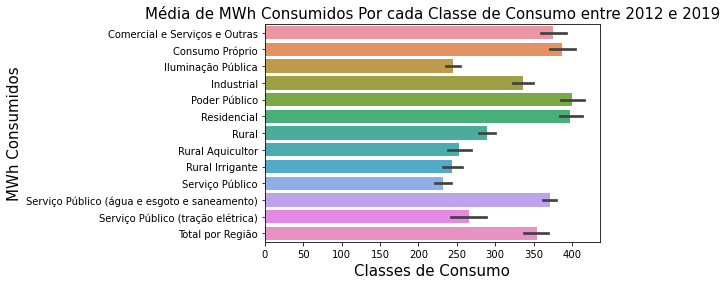

In [12]:
# Gráfico de barras horizontais (bar chart).

sns.barplot(data=new_dataset, x='vlrConsumoMWh', y='nomClasseConsumo', orient = "h")
plt.title("Média de MWh Consumidos Por cada Classe de Consumo entre 2012 e 2019", fontsize = 15)
plt.xlabel("Classes de Consumo", fontsize = 15)
plt.ylabel("MWh Consumidos", fontsize = 15)
plt.show()

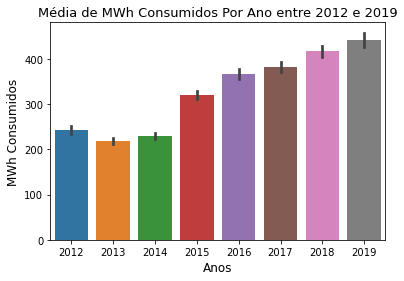

In [13]:
# Gráfico de barras verticais(bar chart).

sns.barplot(data=new_dataset, x='anoReferencia', y='vlrConsumoMWh', orient = "v")
plt.title("Média de MWh Consumidos Por Ano entre 2012 e 2019", fontsize = 13)
plt.xlabel("Anos", fontsize = 12)
plt.ylabel("MWh Consumidos", fontsize = 12)
plt.show()

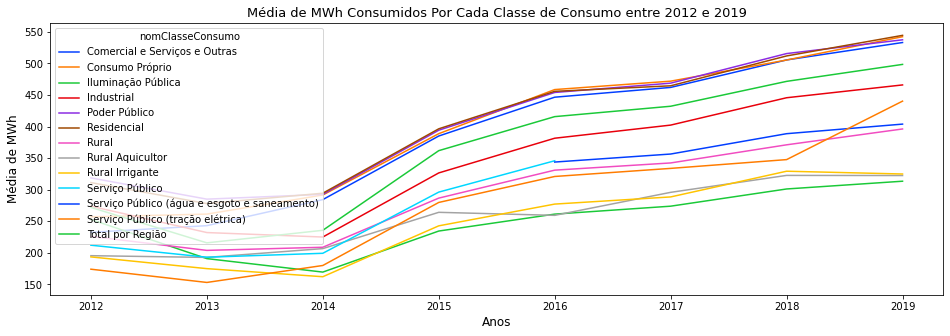

In [14]:
# Gráfico de linha (line chart)

plt.figure(figsize=(16, 5))
sns.lineplot(data=new_dataset, x='anoReferencia', y='vlrConsumoMWh', hue='nomClasseConsumo', palette='bright', ci=None, legend='full')
plt.title("Média de MWh Consumidos Por Cada Classe de Consumo entre 2012 e 2019", fontsize = 13)
plt.xlabel("Anos", fontsize = 12)
plt.ylabel("Média de MWh", fontsize = 12)
plt.show()

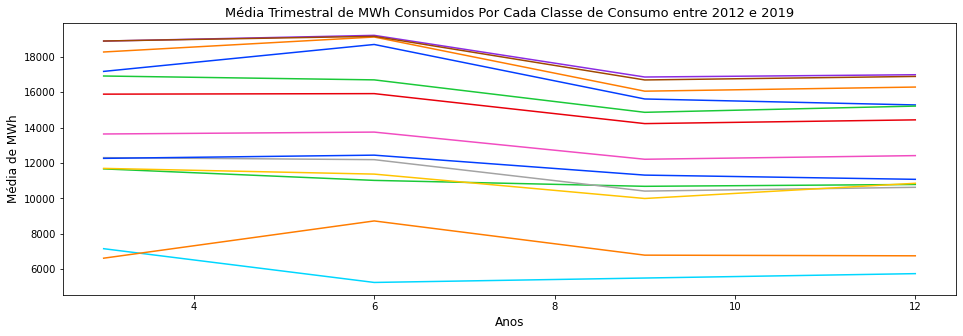

In [15]:
# Gráfico de linha (line chart)

a = dataset.groupby(['nomClasseConsumo', 'mesReferencia']).sum()
plt.figure(figsize=(16, 5))
sns.lineplot(data=a, x='mesReferencia', y='vlrConsumoMWh', hue='nomClasseConsumo', palette='bright', ci=None, legend=False)
plt.title("Média Trimestral de MWh Consumidos Por Cada Classe de Consumo entre 2012 e 2019", fontsize = 13)
plt.xlabel("Anos", fontsize = 12)
plt.ylabel("Média de MWh", fontsize = 12)
plt.show()

In [16]:
# Somatório do valor de consumo de cada classe
dataset.groupby(['nomClasseConsumo']).sum()

,vlrConsumoMWh
nomClasseConsumo,
Comercial e Serviços e Outras,66761.94
Consumo Próprio,69728.12
Iluminação Pública,44161.70
Industrial,60469.20
Poder Público,71933.20
Residencial,71621.11
Rural,52015.71
Rural Aquicultor,45537.78
Rural Irrigante,43924.27


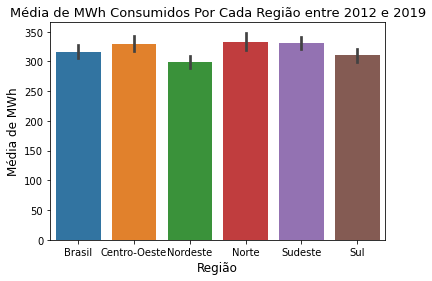

In [17]:
# Gráfico de barras (bar chart)

sns.barplot(data=new_dataset, x='nomRegiao', y='vlrConsumoMWh', orient = "v")
plt.title("Média de MWh Consumidos Por Cada Região entre 2012 e 2019", fontsize = 13)
plt.xlabel("Região", fontsize = 12)
plt.ylabel("Média de MWh", fontsize = 12)
plt.show()

In [18]:
tabela = new_dataset.loc[new_dataset['nomRegiao'] == 'Sul'] # Amarzenagem dos dados referentes a região Sul
tabela2 = new_dataset.loc[new_dataset['nomRegiao'] == 'Sudeste'] # Amarzenagem dos dados referentes a região Sudeste
tabela3 = new_dataset.loc[new_dataset['nomRegiao'] == 'Norte'] # Amarzenagem dos dados referentes a região Norte
tabela4 = new_dataset.loc[new_dataset['nomRegiao'] == 'Nordeste'] # Amarzenagem dos dados referentes a região Nordeste
tabela5 = new_dataset.loc[new_dataset['nomRegiao'] == 'Centro-Oeste'] # Amarzenagem dos dados referentes a região Centro-Oeste

In [19]:
# Armazenamento das informações de cada região por classe de consumo
Sul = tabela.groupby('nomClasseConsumo').sum()
Sudeste = tabela2.groupby('nomClasseConsumo').sum()
Norte = tabela3.groupby('nomClasseConsumo').sum()
Nordeste = tabela4.groupby('nomClasseConsumo').sum()
Centro_Oeste = tabela5.groupby('nomClasseConsumo').sum()

### Consumo detalhado da Região Sul do Brasil

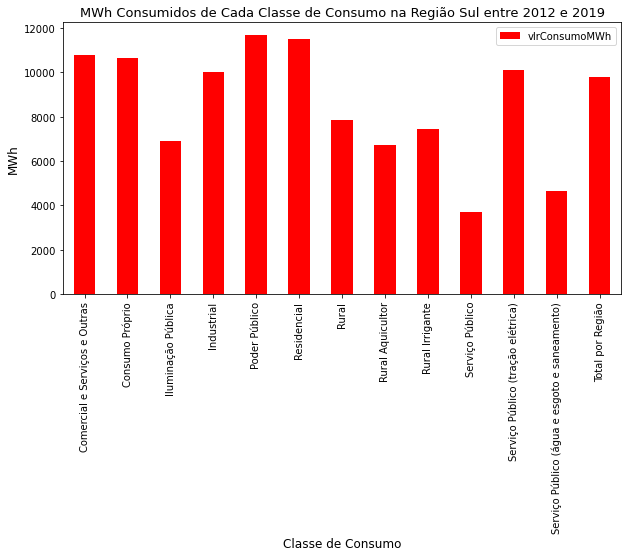

In [20]:
Sul.plot.bar(color = 'red', figsize = (10, 5))
plt.title("MWh Consumidos de Cada Classe de Consumo na Região Sul entre 2012 e 2019", fontsize = 13)
plt.xlabel("Classe de Consumo", fontsize = 12)
plt.ylabel("MWh", fontsize = 12)
plt.show()

### Consumo detalhado da Região Sudeste do Brasil

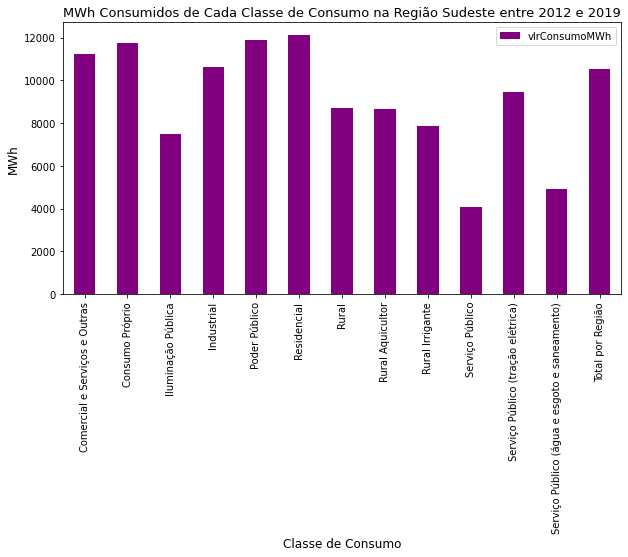

In [21]:
Sudeste.plot.bar(color = 'purple', figsize = (10, 5))
plt.title("MWh Consumidos de Cada Classe de Consumo na Região Sudeste entre 2012 e 2019", fontsize = 13)
plt.xlabel("Classe de Consumo", fontsize = 12)
plt.ylabel("MWh", fontsize = 12)
plt.show()

### Consumo detalhado da Região Nordeste do Brasil

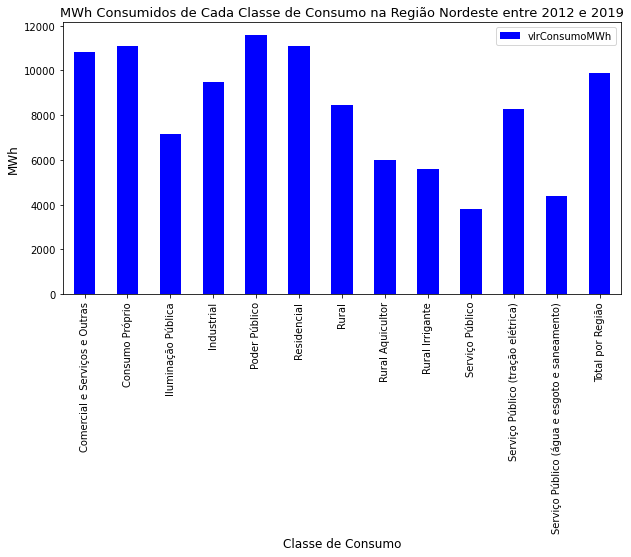

In [22]:
Nordeste.plot.bar(color = 'blue', figsize = (10, 5))
plt.title("MWh Consumidos de Cada Classe de Consumo na Região Nordeste entre 2012 e 2019", fontsize = 13)
plt.xlabel("Classe de Consumo", fontsize = 12)
plt.ylabel("MWh", fontsize = 12)
plt.show()

### Consumo detalhado da Região Norte do Brasil

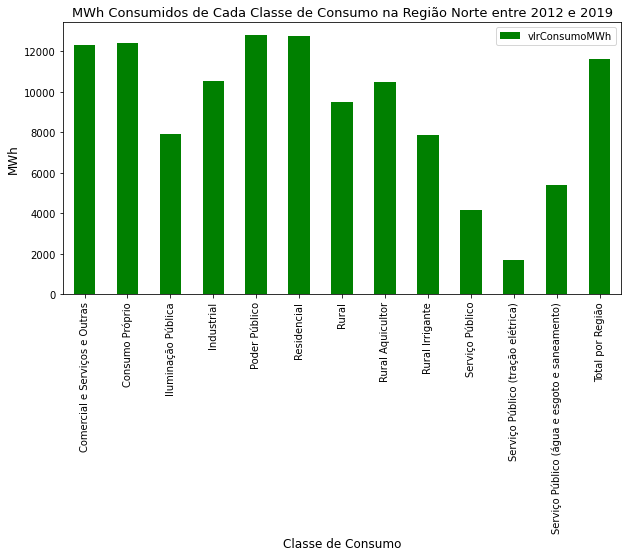

In [23]:
Norte.plot.bar(color = 'green', figsize = (10, 5))
plt.title("MWh Consumidos de Cada Classe de Consumo na Região Norte entre 2012 e 2019", fontsize = 13)
plt.xlabel("Classe de Consumo", fontsize = 12)
plt.ylabel("MWh", fontsize = 12)
plt.show()

### Consumo detalhado da Região Centro-Oeste do Brasil

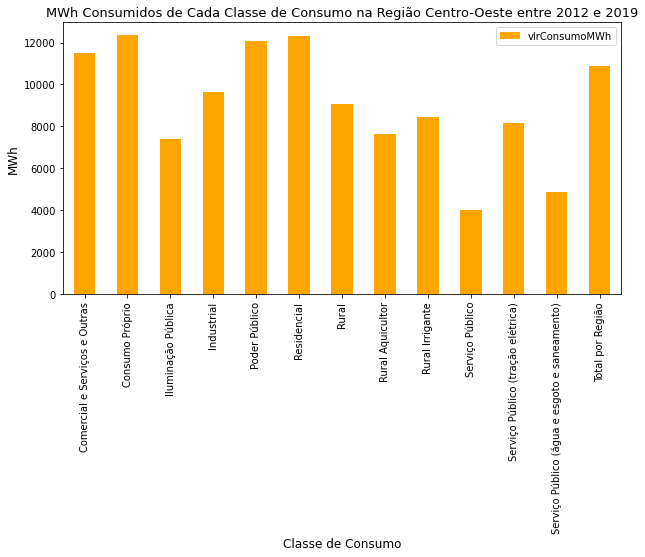

In [24]:
Centro_Oeste.plot.bar(color = 'orange', figsize = (10, 5))
plt.title("MWh Consumidos de Cada Classe de Consumo na Região Centro-Oeste entre 2012 e 2019", fontsize = 13)
plt.xlabel("Classe de Consumo", fontsize = 12)
plt.ylabel("MWh", fontsize = 12)
plt.show()

## Conclusão

Apesar da forma que a ANELL (Agência Nacional de Energia Elétrica) disponibiliza os dados não serem as melhores, podemos tirar algumas conclusões relevantes sobre o assunto. A seguir listo algumas das minhas impressões obtidas com a análise dos dados fornecidos pela Agência.


1- A princípio é possível observar que a classe residencial é uma das líderes de consumo de energia no país. No entanto, ao olhar de forma mais atenta, quando de agrupa todas as classes referentes ao setor público e ao setor rural fica claro que as duas classes são as que mais consomem energia no Brasil.


2- Apesar de nos 3 primeiros anos o consumo ter se mantido estável, os anos seguintes revelam um crescimento que se mostra de acordo com o que vemos no dia a dia da sociedade.


3- É possível perceber também que em quase todas as classes de consumo há uma relevante variação entre os meses de junho e setembro. Isso pode ter várias explicações, mas uma que me vem à cabeça sem fazer uma análise mais aprofundada é o início e o fim do inverno.

4- Em relação a comparação por região, o consumo médio é bem equilibrado, sendo o Nordeste a região que menos consome.

5- Ao analisar cada região detalhadamente é possível ver que o consumo é bem parecido, sempre com o setor público sendo grande responsável pelo consumo.

Para concluir gostaria de deixar uma pergunta: até quando vamos conseguir gerar o tanto de energia que consumimos?
Faço essa pergunta, pois, como vimos a quantidade de energia que consumimos como sociedade cresce a cada ano e como ja está evidente estamos vivendo uma crise energética.